In [ ]:
print(sns.__version__)

0.11.2


#**Análisando as notas no geral**

In [ ]:
import pandas as pd

notas = pd.read_csv("ratings.csv")

In [ ]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.shape

(100836, 4)

In [ ]:
notas.columns = ['usuarioId', 'filmesId', 'nota', 'momento']
notas.head()

,usuarioId,filmesId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#Quais são os valores únicos das series?

notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
# Contando os valores, e ordenando do mais frenquente do menos frequentes.

notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
# Média de todas as notas e mediana.

print('Média', notas['nota'].mean())
print('Médiana', notas['nota'].median())


Média 3.501556983616962
Médiana 3.5


In [ ]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

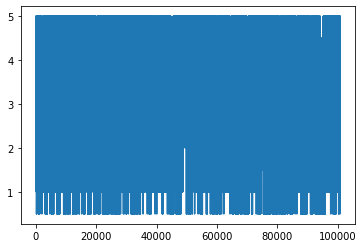

In [ ]:
# Plotando as notas. Demonstra um gráfico que não serve para ser análisado.

notas.nota.plot()

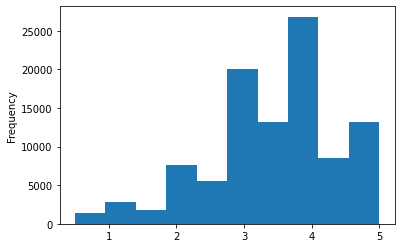

In [ ]:
# Plotando um histograma, para melhor visualização.

notas.nota.plot(kind='hist')

In [ ]:
# É possível ainda tirar essas e outras medidas de uma só vez.

notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


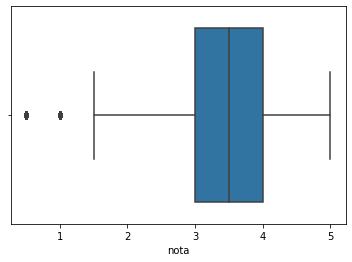

In [ ]:
# Outra visualização que nos permite analisar esses dados é o boxplot que descreve em uma espécie de "caixa" a posição dos valores plotados.

# A mediana está representada no meio do retângulo azul — ou seja, no 3,5, dividindo, em duas partes, 50% dos dados (entre 3 e 3,5, e entre 3,5 e 4. Outros 25% dos nossos dados estão entre 4 e 5, e o restante está abaixo de 3.

# Uma delas é que metade dos usuários (uma parcela muito grande!) deu avaliações entre 3 e 4, e que as notas entre 0,5 e 1,5 figuram pouco significativamente nessa amostra.

import seaborn as sns

sns.boxplot(notas.nota)

#Olhando Filmes

In [ ]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.head()

,usuarioId,filmesId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#**Análisando algumas notas específicas por filmes.** 

In [ ]:
notas.query("filmesId == 1").nota.mean()

3.9209302325581397

In [ ]:
medias_por_filme = notas.groupby('filmesId').mean()['nota']
medias_por_filme.head()

filmesId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

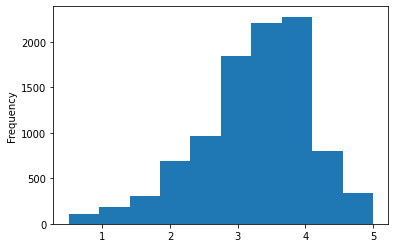

In [ ]:
# Agora, tentaremos plotar esses dados em um gráfico, buscando analisar como essas médias estão distribuídas. Isso pode ser feito com um histograma do Pandas.

medias_por_filme.plot(kind = 'hist')

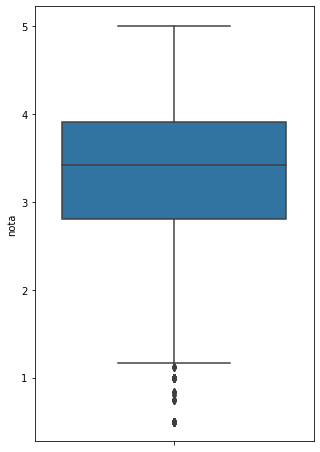

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [ ]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


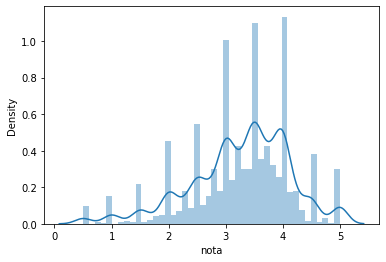

In [ ]:
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

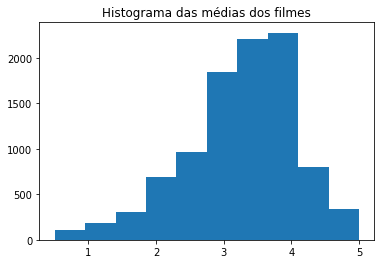

In [ ]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title('Histograma das médias dos filmes')

In [ ]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb.original_language.unique() # categórica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
# primeiro grau
# segundo grau
# terceiro grau
# 1 grau < 2 grau < 3 grau # Isso é uma categórica ordinal.

In [ ]:
# budget => orcamento => quantitativa contínuo

In [ ]:
# quantidade de votos => 1, 2 ,3, 4 não tem 2.5 votos.
# notas do movielens => 0.5, 1, 1.5, ... ,5 nao tem 2.7

In [ ]:
# Transformando em data frame a lingua original e a quantidade de cada lingua.

contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


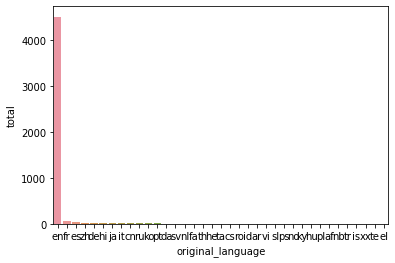

In [ ]:
sns.barplot(x = 'original_language', y = 'total', data = contagem_de_lingua)

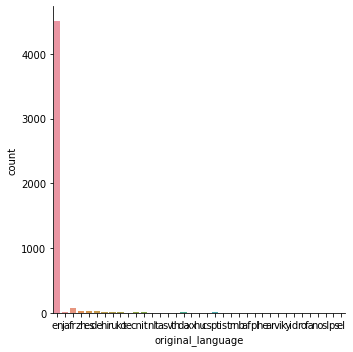

In [ ]:
# No Seaborn, existe uma maneira mais simples de realizarmos essa operação. Porem ainda não fica uma boa visualização de dados.
sns.catplot(x = 'original_language', kind='count', data = tmdb)

([<matplotlib.patches.Wedge at 0x7fb20c4c0bd0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

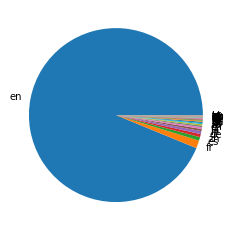

In [ ]:
# O gráfico de pizza ou torta não é recomendado.

plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original_language'])

In [ ]:
# Para melhor visualização devemos comprar o Inglês com as outras linguas.
# Isolando dados.

total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


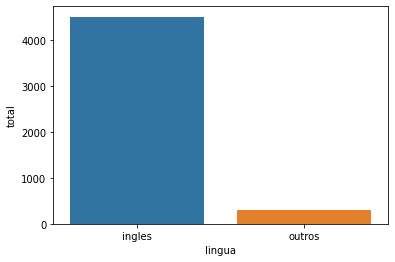

In [ ]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados =  pd.DataFrame(dados)
sns.barplot(x = 'lingua', y = 'total', data = dados)

([<matplotlib.patches.Wedge at 0x7fb20117e2d0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

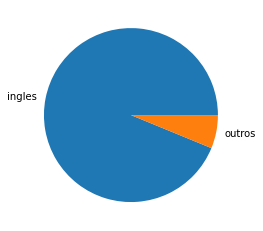

In [ ]:
 plt.pie(dados['total'], labels = dados['lingua'])

In [ ]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes.head()

fr    70
es    32
zh    27
de    27
hi    19
Name: original_language, dtype: int64

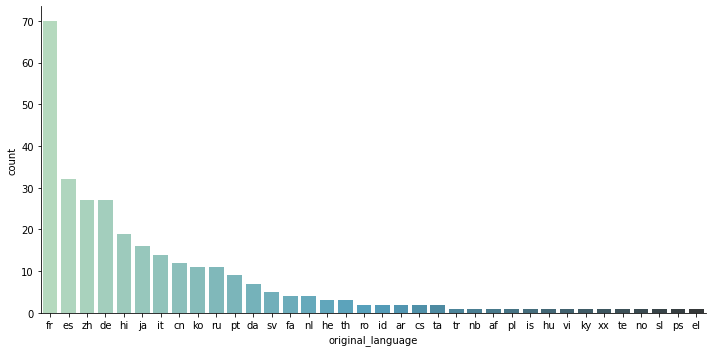

In [ ]:
# Melhorando a visualização: Por o catplot ser de alto nivel, não conseguiremos melhorar a visualização com o figsize, sendo assim na biblioteca nos mostra que existe o aspect.
# Organizando a visualização utilizamos o order do catplot. Faremos pelo indice da variavel.
# Organizando com a pallet do seaborne as cores.

filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

sns.catplot(x = 'original_language', kind='count', data = filmes_sem_lingua_original_em_ingles, aspect = 2, palette = 'GnBu_d', order = total_por_lingua_de_outros_filmes.index)

#**Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, box plot e histograma.**

In [ ]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
notas_do_toy_story = notas.query('filmesId==1')
notas_do_jumanji = notas.query('filmesId==2')
print(len(notas_do_toy_story), len(notas_do_jumanji))


215 110


In [ ]:
print('Nota média do Toy Story %.2f'% notas_do_toy_story.nota.mean())
print('Nota média do Jumanji %.2f'% notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [ ]:
print('Nota mediana do Toy Story %.2f'% notas_do_toy_story.nota.median())
print('Nota mediana do Jumanji %.2f'% notas_do_jumanji.nota.median())

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


In [ ]:
import numpy as np

filme1 = np.append(np.array([2.5] *10), np.array([3.5] *10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [ ]:
filme1

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5,
       3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

In [ ]:
filme2

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
print(filme1.mean(),filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))


3.0 3.0
0.5 2.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

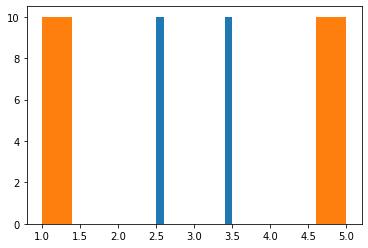

In [ ]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb1fe5bf950>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb1fe544990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb1fe54a990>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb1fe54a490>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb1fe5bfed0>,
  <matplotlib.lines.Line2D at 0x7fb1fe554950>]}

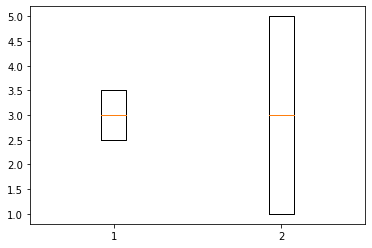

In [ ]:
plt.boxplot([filme1, filme2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


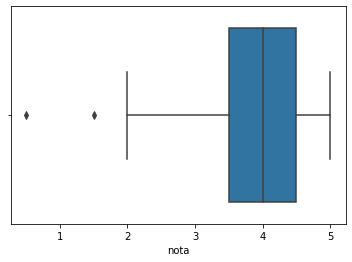

In [ ]:
sns.boxplot(notas_do_toy_story.nota)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


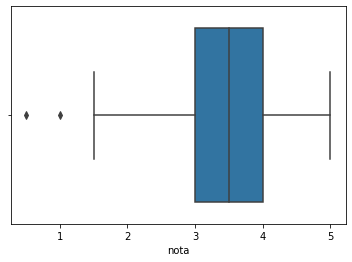

In [ ]:
sns.boxplot(notas_do_jumanji.nota)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7fb1fe432990>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb1fe40d650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb1fe471e50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb1fe40d110>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb1fe463890>,
  <matplotlib.lines.Line2D at 0x7fb1fe3c8450>]}

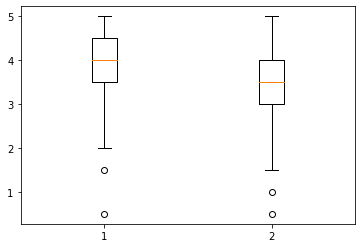

In [ ]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

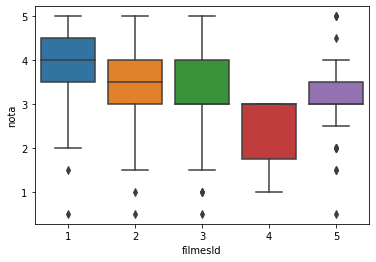

In [ ]:
sns.boxplot(x = 'filmesId', y = 'nota', data = notas.query('filmesId in [1, 2, 3, 4, 5]'))

In [ ]:
print(notas_do_toy_story.nota.std())
print(notas_do_jumanji.nota.std())

0.8348591407114045
0.8817134921476455
